In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [17]:
pard_97=pd.read_csv('data/faktPardavimai1997.csv', sep=';', parse_dates=['pardavimo_data','nupirkimo_data'])
pard_98=pd.read_csv('data/faktPardavimai1998.csv', sep=';', parse_dates=['pardavimo_data','nupirkimo_data'])
pard_99=pd.read_csv('data/faktPardavimai1999.csv', sep=';', parse_dates=['pardavimo_data','nupirkimo_data'])

klientai=pd.read_csv('data/dimKlientai.csv', sep=';')

In [18]:
klientai.head()

,kliento_id,kliento_sask_nr,vardas,pavarde,kliento_adresas,kliento_miestas,kliento_provincija,kliento_pasto_kodas,kliento_salis,gimimo_data,seimynine_padetis,metines_pajamos,lytis,vaiku_skaicius,vaiku_skaicius_namuose,issilavinimas,kliento_registracijos_data,kliento_kortele,uzsiemimas,namu_savininkas
0,1,87462024688,Sheri,Nowmer,2433 Bailey Road,Tlaxiaco,Oaxaca,15057,Mexico,1961-08-26,M,$30K - $50K,F,4,2,Partial High School,1991-09-10,Bronze,Skilled Manual,Y
1,2,87470586299,Derrick,Whelply,2219 Dewing Avenue,Sooke,BC,17172,Canada,1915-07-03,S,$70K - $90K,M,1,0,Partial High School,1993-03-11,Bronze,Professional,N
2,3,87475757600,Jeanne,Derry,7640 First Ave.,Issaquah,WA,73980,USA,1910-06-21,M,$50K - $70K,F,1,1,Bachelors Degree,1991-06-11,Bronze,Professional,Y
3,4,87500482201,Michael,Spence,337 Tosca Way,Burnaby,BC,74674,Canada,1969-06-20,M,$10K - $30K,M,4,4,Partial High School,1994-05-21,Normal,Skilled Manual,N
4,5,87514054179,Maya,Gutierrez,8668 Via Neruda,Novato,CA,57355,USA,1951-05-10,S,$30K - $50K,F,3,0,Partial College,1992-08-21,Silver,Manual,N


In [15]:
pard_99=pard_99.rename(
    columns=
    {
     'Parduotas_kiekis':'kiekis'
    }
)
pard_99.head()

,pardavimo_data,nupirkimo_data,prekes_id,kliento_id,parduotuves_id,kiekis
0,1999-01-01,1998-12-25,4,2439,10,3
1,1999-01-01,1998-12-28,11,4284,10,3
2,1999-01-01,1998-12-28,12,534,10,3
3,1999-01-01,1998-12-29,14,9743,10,2
4,1999-01-01,1998-12-27,16,3608,10,3


In [16]:
pardavimai=pd.concat([pard_97,pard_98,pard_99], axis=0)
pardavimai.head()

,pardavimo_data,nupirkimo_data,prekes_id,kliento_id,parduotuves_id,kiekis
0,1997-01-01,1996-12-31,869,3449,6,5
1,1997-01-01,1996-12-31,1472,3449,6,3
2,1997-01-01,1996-12-28,76,3449,6,4
3,1997-01-01,1996-12-26,320,3449,6,3
4,1997-01-01,1996-12-25,4,3449,6,4


In [19]:
df_klientai_pardavimai=pd.merge(klientai, pardavimai,
                                how="left", on='kliento_id')
df_klientai_pardavimai.head()

,kliento_id,kliento_sask_nr,vardas,pavarde,kliento_adresas,kliento_miestas,kliento_provincija,kliento_pasto_kodas,kliento_salis,gimimo_data,...,issilavinimas,kliento_registracijos_data,kliento_kortele,uzsiemimas,namu_savininkas,pardavimo_data,nupirkimo_data,prekes_id,parduotuves_id,kiekis
0,1,87462024688,Sheri,Nowmer,2433 Bailey Road,Tlaxiaco,Oaxaca,15057,Mexico,1961-08-26,...,Partial High School,1991-09-10,Bronze,Skilled Manual,Y,NaT,NaT,NaN,NaN,NaN
1,2,87470586299,Derrick,Whelply,2219 Dewing Avenue,Sooke,BC,17172,Canada,1915-07-03,...,Partial High School,1993-03-11,Bronze,Professional,N,NaT,NaT,NaN,NaN,NaN
2,3,87475757600,Jeanne,Derry,7640 First Ave.,Issaquah,WA,73980,USA,1910-06-21,...,Bachelors Degree,1991-06-11,Bronze,Professional,Y,1997-04-27,1997-04-23,1318.0,15.0,3.0
3,3,87475757600,Jeanne,Derry,7640 First Ave.,Issaquah,WA,73980,USA,1910-06-21,...,Bachelors Degree,1991-06-11,Bronze,Professional,Y,1997-04-27,1997-04-22,1534.0,15.0,2.0
4,3,87475757600,Jeanne,Derry,7640 First Ave.,Issaquah,WA,73980,USA,1910-06-21,...,Bachelors Degree,1991-06-11,Bronze,Professional,Y,1997-04-27,1997-04-21,885.0,15.0,2.0


array([<Axes: ylabel='kiekis'>], dtype=object)

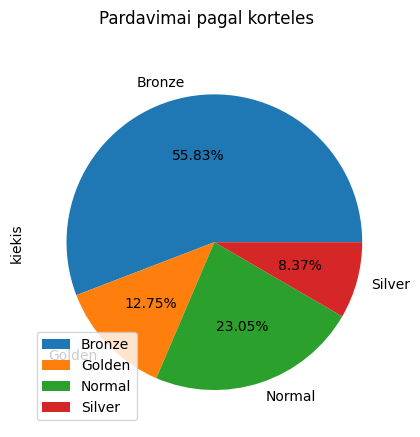

In [27]:
df_klientai_pardavimai[['kliento_kortele', 'kiekis']].groupby('kliento_kortele').sum().plot.pie(subplots=True,
                                                                                               title='Pardavimai pagal korteles',
                                                                                               autopct='%1.2f%%')

In [37]:
df_klientai_pardavimai['metai']=df_klientai_pardavimai['pardavimo_data'].dt.year
df_klientai_pardavimai['metai']=df_klientai_pardavimai['metai'].fillna(0).astype(int)
df_klientai_pardavimai=df_klientai_pardavimai[df_klientai_pardavimai['metai']>0]

In [38]:
df_klientai_pardavimai.head()

,kliento_id,kliento_sask_nr,vardas,pavarde,kliento_adresas,kliento_miestas,kliento_provincija,kliento_pasto_kodas,kliento_salis,gimimo_data,...,kliento_registracijos_data,kliento_kortele,uzsiemimas,namu_savininkas,pardavimo_data,nupirkimo_data,prekes_id,parduotuves_id,kiekis,metai
2,3,87475757600,Jeanne,Derry,7640 First Ave.,Issaquah,WA,73980,USA,1910-06-21,...,1991-06-11,Bronze,Professional,Y,1997-04-27,1997-04-23,1318.0,15.0,3.0,1997
3,3,87475757600,Jeanne,Derry,7640 First Ave.,Issaquah,WA,73980,USA,1910-06-21,...,1991-06-11,Bronze,Professional,Y,1997-04-27,1997-04-22,1534.0,15.0,2.0,1997
4,3,87475757600,Jeanne,Derry,7640 First Ave.,Issaquah,WA,73980,USA,1910-06-21,...,1991-06-11,Bronze,Professional,Y,1997-04-27,1997-04-21,885.0,15.0,2.0,1997
5,3,87475757600,Jeanne,Derry,7640 First Ave.,Issaquah,WA,73980,USA,1910-06-21,...,1991-06-11,Bronze,Professional,Y,1997-04-27,1997-04-23,130.0,15.0,2.0,1997
6,3,87475757600,Jeanne,Derry,7640 First Ave.,Issaquah,WA,73980,USA,1910-06-21,...,1991-06-11,Bronze,Professional,Y,1997-04-27,1997-04-23,1252.0,15.0,3.0,1997


In [39]:
df_klientai_pardavimai[['metai','kiekis']].groupby('metai').sum()

,kiekis
metai,
1997,266773.0
1998,566716.0
1999,4828.0


<Axes: xlabel='kliento_kortele'>

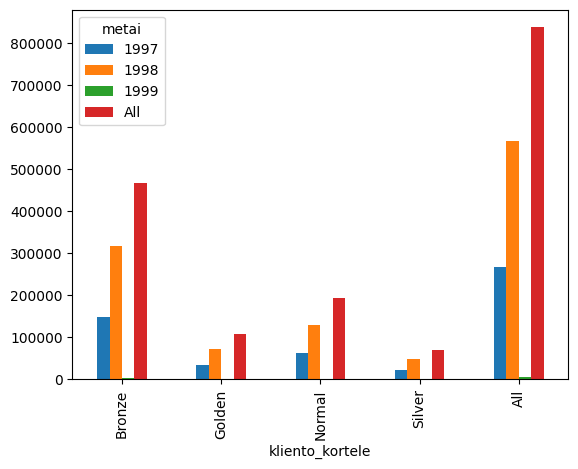

In [47]:
df_klientai_pardavimai.pivot_table(
    values='kiekis',
    index='kliento_kortele',
    columns='metai',
    aggfunc="sum",
    margins=True
).plot(kind='bar')

<Axes: ylabel='Frequency'>

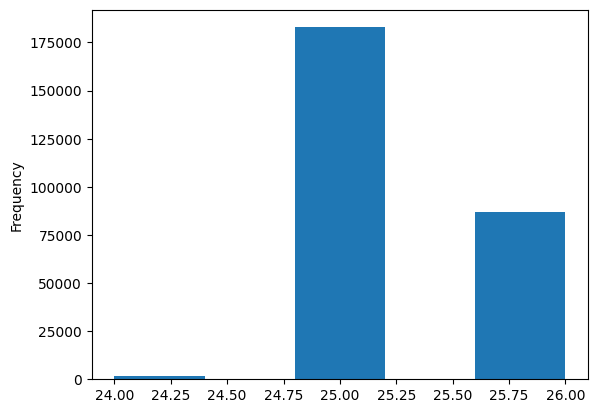

In [55]:
df_klientai_pardavimai['amzius'].plot.hist(bins=5)

In [60]:
df_klientai_pardavimai['amzius'].describe()

count    271282.000000
mean         25.314341
std           0.476495
min          24.000000
25%          25.000000
50%          25.000000
75%          26.000000
max          26.000000
Name: amzius, dtype: float64